# Computer Vision

The final stage of our project is about working a small computer vision model, through which it is possible to:

1st: Read the front cover of a movie and identify the title through the image;

2nd: Automaticlly search on the IMDb data based by the movie name obtained at stage 1, and display all its information.

In [1]:
!pip install torch==1.8.1+cpu torchvision==0.9.1+cpu torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr
!pip install imdbpy

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 169.1MB 92kB/s 
     |████████████████████████████████| 13.4MB 275kB/s 
     |████████████████████████████████| 1.9MB 4.0MB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.8.1+cpu which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
     |████████████████████████████████| 63.2MB 60kB/s 
     |████████████████████████████████| 307kB 4.3MB/s 


In [2]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np
import imdb

In [3]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir('/content/PNG') if isfile(join('PNG', f))]
files

['2.8_101615.jpg',
 '2.4_299930.jpg',
 '10.png',
 '1.6_56415.jpg',
 '11.png',
 '7.png',
 '2.3_118836.jpg',
 '2.2_71198.jpg',
 '2.4_73396.jpg',
 '3.0_91934.jpg',
 '2.4_54673.jpg',
 '3.0_213802.jpg',
 '2.7_93072.jpg',
 '2.4_114658.jpg',
 '1.9_96870.jpg',
 '2.8_54240.jpg',
 '2.2_118589.jpg',
 '3.0_92532.jpg',
 '2.8_116756.jpg',
 '2.8_266747.jpg',
 '3.1_223251.jpg',
 '2.7_110629.jpg',
 '1.9_270846.jpg',
 '3.0_223249.jpg',
 '2.9_49922.jpg',
 '2.9_77942.jpg',
 '2.1_88925.jpg',
 '1.PNG',
 '2.6_118665.jpg',
 '3.0_104837.jpg',
 '2.4_117550.jpg',
 '3.png',
 '2.8_120598.jpg',
 '9.png',
 '2.9_93300.jpg',
 '2.2_55946.jpg',
 '1.9_60666.jpg',
 '2.1_339034.jpg',
 '6.png',
 '2.9_115834.jpg',
 '4.png',
 '2.4_223250.jpg',
 '3.1_110647.jpg',
 '2.8_99030.jpg',
 '2.5_168172.jpg',
 '2.1_81693.jpg',
 '2.8_73043.jpg',
 '12.png',
 '2.8_113449.jpg',
 '2.2_57181.jpg',
 '2.8_121261.jpg',
 '1.6_245943.jpg',
 '2.4_56600.jpg',
 '2.1_68291.jpg',
 '2.4_185183.jpg',
 '5.png',
 '2.4_116839.jpg',
 '3.0_246894.jpg',
 '2.4_

In [28]:
IMAGE_PATH = 'PNG/'+ files[5]

In [29]:
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(IMAGE_PATH, contrast_ths = 0.1, adjust_contrast = 0.5, add_margin = 0.2,
                         width_ths = 0.5, decoder = 'beamsearch')

Using CPU. Note: This module is much faster with a GPU.


<function matplotlib.pyplot.show>

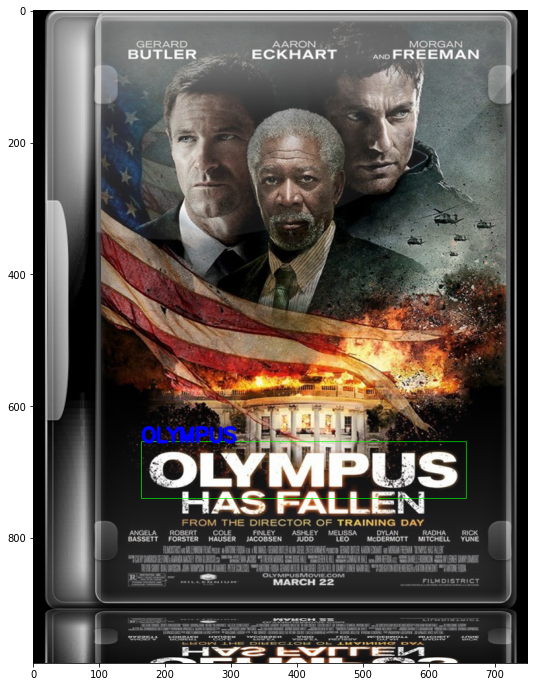

In [30]:
img = cv2.imread(IMAGE_PATH)
old_box_area = 0
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    boxH = bottom_right[1] - top_left[1]
    boxW = bottom_right[0] - top_left[0]
    box_area = boxH * boxW
    if box_area > old_box_area:
        title = detection[1]
        tf = top_left
        br = bottom_right
        old_box_area = box_area
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.rectangle(img, tf, br, (0,255,0),1)
img = cv2.putText(img, title, tf, font, 1, (255,0,0),4, cv2.LINE_AA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show

In [31]:
ia = imdb.IMDb()

In [32]:
movies = ia.search_movie(title)
movies

[<Movie id:3681794[http] title:_"Olympus" (2015)_>,
 <Movie id:2509226[http] title:_Olympus (in development) (None) (TV)_>,
 <Movie id:13255666[http] title:_Olympus (2021) (TV)_>,
 <Movie id:2302755[http] title:_Olympus Has Fallen (2013)_>,
 <Movie id:3300542[http] title:_London Has Fallen (2016)_>,
 <Movie id:2822494[http] title:_Olympus Has Fallen Sweded (2013)_>,
 <Movie id:6523816[http] title:_"Olympus Guardian" (2002)_>,
 <Movie id:1964972[http] title:_Olympus Force: The Key (1988)_>,
 <Movie id:11106662[http] title:_"Lore Olympus" (None)_>,
 <Movie id:10691152[http] title:_"Olympus" (None)_>,
 <Movie id:1575651[http] title:_Olympus (2006)_>,
 <Movie id:2491960[http] title:_Olympus (2006)_>,
 <Movie id:5096198[http] title:_Olympus (in development) (None)_>,
 <Movie id:12382310[http] title:_"Reality Z" Olympus (2020)_>,
 <Movie id:2379365[http] title:_"Olympia" (2012)_>,
 <Movie id:1930428[http] title:_Olympia (2011)_>,
 <Movie id:5742714[http] title:_"Olympus High (in development)